In [ ]:
!pip install trimesh
!unzip urdf.zip -d urdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 4.4 MB/s eta 0:00:00
Archive:  urdf.zip
   creating: urdf/urdf/gripper/
   creating: urdf/urdf/gripper/mesh/
   creating: urdf/urdf/gripper/mesh/robotiq_140/
   creating: urdf/urdf/gripper/mesh/robotiq_140/collision/
  inflating: urdf/urdf/gripper/mesh/robotiq_140/collision/robotiq_arg2f_140_inner_finger.stl  
  inflating: urdf/urdf/gripper/mesh/robotiq_140/collision/robotiq_arg2f_140_inner_knuckle.stl  
  inflating: urdf/urdf/gripper/mesh/robotiq_140/collision/robotiq_arg2f_140_outer_finger.stl  
  inflating: urdf/urdf/gripper/mesh/robotiq_140/collision/robotiq_arg2f_140_outer_knuckle.stl  
  inflating: urdf/urdf/gripper/mesh/robotiq_140/collision/robotiq_arg2f_base_link.stl  
  inflating: urdf/urdf/gripper/mesh/robotiq_140/collision/robotiq_arg2f_coupling.stl  
   creating: urdf/urdf/gripper/mesh/robotiq_140/visual/
  inflating: urdf/urdf/gripper/mesh/robotiq_140/visual/robotiq_arg2f_140_inner_finger.stl  
  inflating: urdf

# 3. Forward Kinematics 2



###Implement Recursive Forward Kinematics for a Robotic Arm
You are to implement a Python function to compute the forward kinematics of a robotic arm described by a kinematic tree. The function will utilize the transformation matrices and the joint configurations provided to determine the position and orientation of all links in the robot.

The robotic arm is modeled in a URDF file, which provides detailed descriptions of each link and joint, including joint types (revolute, prismatic, and fixed), the axis of rotation or translation, and the initial position and orientation relative to the parent link.

__Function to Implement__: forward_kinematics(link, offset_transformation=np.eye(4), thetas={})

__Inputs__:
- link: An object representing the current link of the robot starting from the base link. This object includes properties such as the list of child joints.
- offset_transformation: A numpy array representing the homogeneous transformation matrix to the current link from the base frame.
- thetas: A dictionary where keys are joint names and values are the current angles (for revolute joints) or displacements (for prismatic joints).

__Outputs__:
- This function does not return a value but updates each link's transformation attribute with the computed transformation matrix relative to the base frame.

__Tasks__:
1. For each joint connected to the current link, compute the transformation due to the joint based on its type (revolute or prismatic) using the provided joint angles or displacements.
2. Combine the transformations sequentially to update the pose of each subsequent child link.
3. Recursively apply the function to each child link until the end of each branch of the kinematic tree is reached.

__Hints__:

- Use the provided helper functions such as compute_transformation for converting rotation and position to a transformation matrix and exponential_map_rotation for computing rotations for revolute joints.
- Assume that all rotational axes are about the z-axis for simplicity unless specified by the joint's axis property.
- The initial call to this function should start with the base link and an identity matrix as the offset_transformation.

Example of Output:
```
Link: panda_link_0
  Joint: panda_pedestal_fixed -> panda_pedestal
  Link: panda_pedestal
  Joint: panda_controller_box_fixed -> panda_controller_box
  Link: panda_controller_box
  Joint: panda_pedestal_feet_fixed -> panda_pedestal_feet
  Link: panda_pedestal_feet
  Joint: panda_joint1 -> panda_link_1
  Link: panda_link_1
    Joint: panda_joint2 -> panda_link_2
    Link: panda_link_2
      Joint: panda_joint3 -> panda_link_3
      Link: panda_link_3
        Joint: panda_joint4 -> panda_link_4
        Link: panda_link_4
          Joint: panda_joint5 -> panda_link_5
          Link: panda_link_5
            Joint: panda_joint6 -> panda_link_6
            Link: panda_link_6
              Joint: panda_joint7 -> panda_link_7
              Link: panda_link_7
                Joint: right_hand_fixed -> right_hand
                Link: right_hand
                  Joint: panda_right_gripper_fixed -> right_gripper
                  Link: right_gripper
                    Joint: panda_finger_joint1 -> leftfinger
                    Link: leftfinger
                    Joint: panda_finger_joint2 -> rightfinger
                    Link: rightfinger
                  Joint: panda_eef_fixed -> tcp
                  Link: tcp
Link Positions:
Link: panda_link_0, Position: [0. 0. 0.]
  Link: panda_pedestal, Position: [0. 0. 0.]
  Link: panda_controller_box, Position: [0. 0. 0.]
  Link: panda_pedestal_feet, Position: [0. 0. 0.]
  Link: panda_link_1, Position: [0.    0.    0.333]
    Link: panda_link_2, Position: [0.    0.    0.333]
      Link: panda_link_3, Position: [ 0.00000000e+00 -1.54732208e-12  6.49000000e-01]
        Link: panda_link_4, Position: [ 8.25000000e-02 -1.54732208e-12  6.49000000e-01]
          Link: panda_link_5, Position: [0.00000000e+00 3.32968042e-13 1.03300000e+00]
            Link: panda_link_6, Position: [0.00000000e+00 3.32968042e-13 1.03300000e+00]
              Link: panda_link_7, Position: [8.80000000e-02 3.32968042e-13 1.03300000e+00]
                Link: right_hand, Position: [ 8.80000000e-02 -7.10005385e-13  9.26500000e-01]
                  Link: right_gripper, Position: [ 8.80000000e-02 -7.10005385e-13  9.26500000e-01]
                    Link: leftfinger, Position: [ 0.0880197 -0.04       0.8741   ]
                    Link: rightfinger, Position: [0.0879803 0.04      0.8741   ]
                  Link: tcp, Position: [ 8.80000000e-02 -1.65994362e-12  8.29500000e-01]
```

Robot Structure:
Link: panda_link_0
  Joint: panda_pedestal_fixed -> panda_pedestal
  Link: panda_pedestal
  Joint: panda_controller_box_fixed -> panda_controller_box
  Link: panda_controller_box
  Joint: panda_pedestal_feet_fixed -> panda_pedestal_feet
  Link: panda_pedestal_feet
  Joint: panda_joint1 -> panda_link_1
  Link: panda_link_1
    Joint: panda_joint2 -> panda_link_2
    Link: panda_link_2
      Joint: panda_joint3 -> panda_link_3
      Link: panda_link_3
        Joint: panda_joint4 -> panda_link_4
        Link: panda_link_4
          Joint: panda_joint5 -> panda_link_5
          Link: panda_link_5
            Joint: panda_joint6 -> panda_link_6
            Link: panda_link_6
              Joint: panda_joint7 -> panda_link_7
              Link: panda_link_7
                Joint: right_hand_fixed -> right_hand
                Link: right_hand
                  Joint: panda_right_gripper_fixed -> right_gripper
                  Link: right_gripper
                    Joint: p

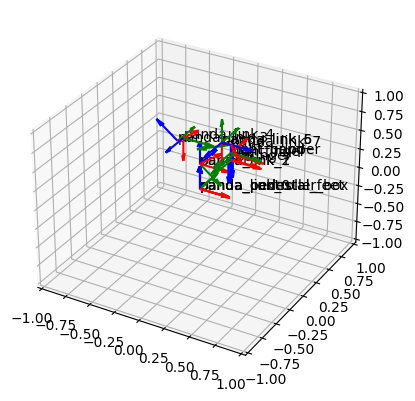

In [ ]:
import matplotlib.pyplot as plt
import trimesh
from mpl_toolkits.mplot3d import Axes3D, art3d
import numpy as np

import xml.etree.ElementTree as ET
import numpy as np

def convert_string_to_narray(str_input):
    """
    Args:
        str_input (str): string

    Returns:
        np.array: Returns string to np.array
    """
    return np.array([float(data) for data in str_input.split()])

class Visual:
    def __init__(self, origin_position, origin_orientation, geometry_type, filename, color):
        self.origin_position = origin_position
        self.origin_orientation = origin_orientation
        self.geometry_type = geometry_type
        self.filename = filename
        self.color = color

class Collision:
    def __init__(self, origin_position, origin_orientation, geometry_type, filename=None, parameters=None):
        self.origin_position = origin_position
        self.origin_orientation = origin_orientation
        self.geometry_type = geometry_type
        self.filename = filename
        self.parameters = parameters

class Link:
    def __init__(self, name):
        self.name = name
        self.visuals = []
        self.collisions = []
        self.children = []

class Joint:
    def __init__(self, name, joint_type, parent_link, child_link, origin_position, origin_orientation, axis, limits=None):
        self.name = name
        self.joint_type = joint_type
        self.parent_link = parent_link
        self.child_link = child_link
        self.origin_position = origin_position
        self.origin_orientation = origin_orientation
        self.axis = axis
        self.limits = limits

def parse_geometry(element, prefix='./'):
    geometry_type = list(element.find('geometry'))[0].tag
    filename = None
    parameters = {}
    if geometry_type == 'mesh':
        filename = prefix+element.find('geometry/mesh').attrib['filename']
    elif geometry_type in ['box', 'cylinder', 'sphere']:
        parameters = element.find(f'geometry/{geometry_type}').attrib
    return geometry_type, filename, parameters

def parse_limits(element):
    if element is None:
        return None
    limits = {'lower': element.attrib.get('lower'),
              'upper': element.attrib.get('upper'),
              'effort': element.attrib.get('effort'),
              'velocity': element.attrib.get('velocity')}
    return limits

def parse_urdf(urdf_path,prefix='./'):
    tree = ET.parse(prefix+urdf_path)
    root = tree.getroot()

    links = {}
    joints = {}

    for elem_link in root.findall('link'):
        link = Link(elem_link.attrib['name'])

        # Process visual elements
        for visual in elem_link.findall('visual'):
            origin = visual.find('origin')
            origin_pos = convert_string_to_narray(origin.attrib.get('xyz') if origin is not None else '0 0 0')
            origin_orient = convert_string_to_narray(origin.attrib.get('rpy') if origin is not None else '0 0 0')
            geom_type, filename, params = parse_geometry(visual, prefix=prefix)
            color = visual.find('material/color').attrib.get('rgba') if visual.find('material/color') is not None else 'N/A'
            link.visuals.append(Visual(origin_pos, origin_orient, geom_type, filename, color))

        # Process collision elements
        for collision in elem_link.findall('collision'):
            origin = collision.find('origin')
            origin_pos = convert_string_to_narray(origin.attrib.get('xyz') if origin is not None else '0 0 0')
            origin_orient = convert_string_to_narray(origin.attrib.get('rpy') if origin is not None else '0 0 0')
            geom_type, filename, params = parse_geometry(collision, prefix=prefix)
            link.collisions.append(Collision(origin_pos, origin_orient, geom_type, filename, params))

        links[link.name] = link

    # Parse joints
    for elem_joint in root.findall('joint'):
        origin = elem_joint.find('origin')
        origin_pos = convert_string_to_narray(origin.attrib.get('xyz') if origin is not None else '0 0 0')
        origin_orient = convert_string_to_narray(origin.attrib.get('rpy') if origin is not None else '0 0 0')
        axis = elem_joint.find('axis')
        xyz_axis = convert_string_to_narray(axis.attrib.get('xyz') if axis is not None else '0 0 0')
        limits = parse_limits(elem_joint.find('limit'))

        joint = Joint(name=elem_joint.attrib['name'],
                      joint_type=elem_joint.attrib['type'],
                      parent_link=links[elem_joint.find('parent').attrib['link']],
                      child_link=links[elem_joint.find('child').attrib['link']],
                      origin_position=origin_pos,
                      origin_orientation=origin_orient,
                      axis=xyz_axis,
                      limits=limits)
        joints[joint.name] = joint
        links[joint.parent_link.name].children.append(joint)

    root_link = next(link for link in links.values() if not any(joint.child_link == link for joint in joints.values()))
    return root_link, links, joints

def draw_frame(ax, T, name, scale=0.3):
    """
    Draw the X, Y, and Z axes of a frame based on the transformation matrix.
    """
    # Origin of the frame
    origin = T[:3, 3]

    # Directions of the X, Y, Z axes transformed by the rotation part of T
    x_dir = T[:3, :3] @ np.array([scale, 0, 0])
    y_dir = T[:3, :3] @ np.array([0, scale, 0])
    z_dir = T[:3, :3] @ np.array([0, 0, scale])

    # Draw the axes
    ax.quiver(*origin, *x_dir, color='r', length=scale, normalize=True)
    ax.quiver(*origin, *y_dir, color='g', length=scale, normalize=True)
    ax.quiver(*origin, *z_dir, color='b', length=scale, normalize=True)
    # Add the frame name as text
    ax.text(*origin, name, color='black')

def rpy_to_rotation_matrix(rpy):
    """Convert RPY (roll, pitch, yaw) angles to a rotation matrix."""
    roll, pitch, yaw = rpy
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(roll), -np.sin(roll)],
        [0, np.sin(roll), np.cos(roll)]
    ])
    Ry = np.array([
        [np.cos(pitch), 0, np.sin(pitch)],
        [0, 1, 0],
        [-np.sin(pitch), 0, np.cos(pitch)]
    ])
    Rz = np.array([
        [np.cos(yaw), -np.sin(yaw), 0],
        [np.sin(yaw), np.cos(yaw), 0],
        [0, 0, 1]
    ])
    R = Rz @ Ry @ Rx
    return R

def compute_transformation(rpy, position):
    """Compute the homogeneous transformation matrix using RPY and origin."""
    R = rpy_to_rotation_matrix(rpy)
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = position
    return T

def angular_velocity_to_skew_symmetric(omega):
    omega_x, omega_y, omega_z = omega
    skew_symmetric = np.array([
        [0, -omega_z, omega_y],
        [omega_z, 0, -omega_x],
        [-omega_y, omega_x, 0]
    ])
    return skew_symmetric

def exponential_map_rotation(axis, theta):
    if np.abs(theta) < np.finfo(float).eps:
        return np.eye(3)
    skew_symmetric = angular_velocity_to_skew_symmetric(axis)
    R = np.eye(3) + np.sin(theta) * skew_symmetric + (1 - np.cos(theta)) * skew_symmetric @ skew_symmetric
    return R

def print_link_tree(link, level=0):
    """
    Recursively prints the tree of links and joints.
    """
    indent = "  " * level
    print(f"{indent}Link: {link.name}")
    for child_joint in link.children:
        print(f"{indent}  Joint: {child_joint.name} -> {child_joint.child_link.name}")
        print_link_tree(child_joint.child_link, level + 1)

def forward_kinematics(link, offset_transformation=np.eye(4), thetas={}):
    """
    Recursively compute the forward kinematics for each link in a robotic structure.

    Args:
        link (Link): The current link from which to start calculating the forward kinematics.
        offset_transformation (numpy.ndarray): The transformation matrix representing the cumulative
            transformation from the base to the current link.
        thetas (dict): A dictionary where the keys are joint names and the values are the current
            joint angles or displacements.

    This function updates the transformation matrix of each link starting from the base link provided
    and recursively moving through all child joints and links. It assumes that the robot structure
    is a tree with nodes as links and edges as joints connecting these links.
    """

    # Update the transformation matrix of the current link. This matrix transforms
    # points from the link's local coordinate system to the base coordinate system.
    link.transformation = offset_transformation

    # Iterate over each joint that is a child of the current link.
    for child_joint in link.children:

        # Retrieve the joint angle or displacement from the thetas dictionary, defaulting to 0 if not specified.

        # Initialize the joint transformation matrix as an identity matrix.
        T_theta = np.eye(4)
        # Check the type of joint and compute the appropriate transformation matrix.
        if child_joint.joint_type == 'revolute':
            # For revolute joints, the joint transformation is a rotation matrix around the joint's axis.
            theta = thetas.get(child_joint.name, 0.)
            # Compute the scaled axis vector.
            # Convert to a rotation matrix.
            R_theta = exponential_map_rotation(child_joint.axis, theta)
            T_theta[:3, :3] = R_theta
        elif child_joint.joint_type == 'prismatic':
            # For prismatic joints, the joint transformation is a translation along the joint's axis.
            # Compute the translation vector.
            T_theta[:3, 3] = child_joint.axis * thetas.get(child_joint.name, 0.)
        elif child_joint.joint_type == 'fixed':
            T_theta = np.eye(4)
        # Compute the static transformation from the current joint to the child link.
        T_joint_to_child = compute_transformation(child_joint.origin_orientation, child_joint.origin_position)
        child_transformation = offset_transformation @ T_joint_to_child @ T_theta
        # This includes any fixed offsets from the joint to the link itself.
        forward_kinematics(child_joint.child_link, child_transformation, thetas)
        # Recursive call: compute the transformation for the child link and update its transformation attribute.
        # Multiply the current transformation with the joint transformation and the child link transformation
        # to get the transformation relative to the base.

def print_link_positions(link, level=0):
    """Recursively print the position of each link."""
    indent = "  " * level
    position = link.transformation[:3, 3]
    print(f"{indent}Link: {link.name}, Position: {position}")
    for child_joint in link.children:
        print_link_positions(child_joint.child_link, level + 1)

def visualize_robot_frames_with_axes(root_link):
    """
    Visualize the robot frames with axes for each frame.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    def recurse_links(link):
        """
        Recursively process each link to draw its frame and proceed to its children.
        """
        # Draw the current frame
        draw_frame(ax, link.transformation, link.name)

        # Process child joints
        for child_joint in link.children:
            recurse_links(child_joint.child_link)

    # Start the recursion with the root link
    recurse_links(root_link)
    ax.set_xlim([-1, 1]), ax.set_ylim([-1, 1]), ax.set_zlim([-1, 1])

def visualize_robot_with_meshes(link):
    def recurse_mesh_combine(_link):
        combined_mesh = None
        for visual in _link.visuals:
            if visual.filename is not None:
                filename = visual.filename
                T_link_to_mesh = compute_transformation(visual.origin_orientation, visual.origin_position)
                # Assuming the mesh path is correct and accessible
                mesh = trimesh.load_mesh(filename)
                mesh.apply_transform(_link.transformation @ T_link_to_mesh)
                if combined_mesh is None:
                    combined_mesh = mesh
                else:
                    combined_mesh += mesh

        for child_joint in _link.children:
            combined_mesh += recurse_mesh_combine(child_joint.child_link)
        return combined_mesh

    combined_mesh = recurse_mesh_combine(link)
    # Visualize all meshes in separate figures
    display(combined_mesh.show())

# Example usage
# Load the robot structure from the URDF file (see previous step)
prefix = './urdf/urdf/panda/'
urdf_path = 'panda.urdf'
root_link, links, joints = parse_urdf(urdf_path,prefix=prefix)
print("Robot Structure:")
print_link_tree(root_link)

# Compute forward kinematics with an example joint angle
forward_kinematics(root_link,thetas={'panda_joint1':0.,
                                     'panda_joint2':-np.pi/4.,
                                     'panda_joint3':0.,
                                     'panda_joint4':-3.*np.pi/4.,
                                     'panda_joint5':0.,
                                     'panda_joint6':np.pi/2.,
                                     'panda_joint7':np.pi/4.})

# Print the positions of each link
print("Link Positions:")
print_link_positions(root_link)
visualize_robot_frames_with_axes(root_link)
visualize_robot_with_meshes(root_link)

###Forward Kinematics for Arbitrary URDF Files

Parse the URDFs of the following robots and compute the forward kinematics for a given configuration, then print and visualize the results.

- doosan_with_robotiq140.urdf
- iiwa14.urdf
- sawyer.urdf
- ur5e_with_robotiq140.urdf

Robot Structure:
Link: ur5e_base_link
  Joint: ur5e_pedestal_fixed -> ur5e_pedestal
  Link: ur5e_pedestal
  Joint: ur5e_controller_box_fixed -> ur5e_controller_box
  Link: ur5e_controller_box
  Joint: ur5e_pedestal_feet_fixed -> ur5e_pedestal_feet
  Link: ur5e_pedestal_feet
  Joint: shoulder_pan_joint -> ur5e_shoulder_link
  Link: ur5e_shoulder_link
    Joint: shoulder_lift_joint -> ur5e_upper_arm_link
    Link: ur5e_upper_arm_link
      Joint: elbow_joint -> ur5e_forearm_link
      Link: ur5e_forearm_link
        Joint: wrist_1_joint -> ur5e_wrist_1_link
        Link: ur5e_wrist_1_link
          Joint: wrist_2_joint -> ur5e_wrist_2_link
          Link: ur5e_wrist_2_link
            Joint: wrist_3_joint -> ur5e_wrist_3_link
            Link: ur5e_wrist_3_link
              Joint: ee_fixed_joint -> ur5e_right_hand
              Link: ur5e_right_hand
Link Positions:
Link: ur5e_base_link, Position: [0. 0. 0.]
  Link: ur5e_pedestal, Position: [0. 0. 0.]
  Link: ur5e_controller_box, Positio

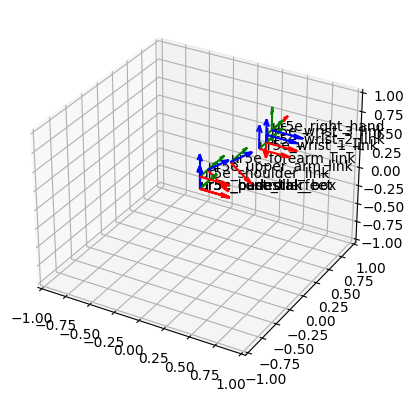

In [ ]:
import matplotlib.pyplot as plt
import trimesh
from mpl_toolkits.mplot3d import Axes3D, art3d
import numpy as np

import xml.etree.ElementTree as ET
import numpy as np

def convert_string_to_narray(str_input):
    """
    Args:
        str_input (str): string

    Returns:
        np.array: Returns string to np.array
    """
    return np.array([float(data) for data in str_input.split()])

class Visual:
    def __init__(self, origin_position, origin_orientation, geometry_type, filename, color):
        self.origin_position = origin_position
        self.origin_orientation = origin_orientation
        self.geometry_type = geometry_type
        self.filename = filename
        self.color = color

class Collision:
    def __init__(self, origin_position, origin_orientation, geometry_type, filename=None, parameters=None):
        self.origin_position = origin_position
        self.origin_orientation = origin_orientation
        self.geometry_type = geometry_type
        self.filename = filename
        self.parameters = parameters

class Link:
    def __init__(self, name):
        self.name = name
        self.visuals = []
        self.collisions = []
        self.children = []

class Joint:
    def __init__(self, name, joint_type, parent_link, child_link, origin_position, origin_orientation, axis, limits=None):
        self.name = name
        self.joint_type = joint_type
        self.parent_link = parent_link
        self.child_link = child_link
        self.origin_position = origin_position
        self.origin_orientation = origin_orientation
        self.axis = axis
        self.limits = limits

def parse_geometry(element, prefix='./'):
    geometry_type = list(element.find('geometry'))[0].tag
    filename = None
    parameters = {}
    if geometry_type == 'mesh':
        filename = prefix+element.find('geometry/mesh').attrib['filename']
    elif geometry_type in ['box', 'cylinder', 'sphere']:
        parameters = element.find(f'geometry/{geometry_type}').attrib
    return geometry_type, filename, parameters

def parse_limits(element):
    if element is None:
        return None
    limits = {'lower': element.attrib.get('lower'),
              'upper': element.attrib.get('upper'),
              'effort': element.attrib.get('effort'),
              'velocity': element.attrib.get('velocity')}
    return limits

def parse_urdf(urdf_path,prefix='./'):
    tree = ET.parse(prefix+urdf_path)
    root = tree.getroot()

    links = {}
    joints = {}

    for elem_link in root.findall('link'):
        link = Link(elem_link.attrib['name'])

        # Process visual elements
        for visual in elem_link.findall('visual'):
            origin = visual.find('origin')
            origin_pos = convert_string_to_narray(origin.attrib.get('xyz') if origin is not None else '0 0 0')
            origin_orient = convert_string_to_narray(origin.attrib.get('rpy') if origin is not None else '0 0 0')
            geom_type, filename, params = parse_geometry(visual, prefix=prefix)
            color = visual.find('material/color').attrib.get('rgba') if visual.find('material/color') is not None else 'N/A'
            link.visuals.append(Visual(origin_pos, origin_orient, geom_type, filename, color))

        # Process collision elements
        for collision in elem_link.findall('collision'):
            origin = collision.find('origin')
            origin_pos = convert_string_to_narray(origin.attrib.get('xyz') if origin is not None else '0 0 0')
            origin_orient = convert_string_to_narray(origin.attrib.get('rpy') if origin is not None else '0 0 0')
            geom_type, filename, params = parse_geometry(collision, prefix=prefix)
            link.collisions.append(Collision(origin_pos, origin_orient, geom_type, filename, params))

        links[link.name] = link

    # Parse joints
    for elem_joint in root.findall('joint'):
        origin = elem_joint.find('origin')
        origin_pos = convert_string_to_narray(origin.attrib.get('xyz') if origin is not None else '0 0 0')
        origin_orient = convert_string_to_narray(origin.attrib.get('rpy') if origin is not None else '0 0 0')
        axis = elem_joint.find('axis')
        xyz_axis = convert_string_to_narray(axis.attrib.get('xyz') if axis is not None else '0 0 0')
        limits = parse_limits(elem_joint.find('limit'))

        joint = Joint(name=elem_joint.attrib['name'],
                      joint_type=elem_joint.attrib['type'],
                      parent_link=links[elem_joint.find('parent').attrib['link']],
                      child_link=links[elem_joint.find('child').attrib['link']],
                      origin_position=origin_pos,
                      origin_orientation=origin_orient,
                      axis=xyz_axis,
                      limits=limits)
        joints[joint.name] = joint
        links[joint.parent_link.name].children.append(joint)

    root_link = next(link for link in links.values() if not any(joint.child_link == link for joint in joints.values()))
    return root_link, links, joints

def draw_frame(ax, T, name, scale=0.3):
    """
    Draw the X, Y, and Z axes of a frame based on the transformation matrix.
    """
    # Origin of the frame
    origin = T[:3, 3]

    # Directions of the X, Y, Z axes transformed by the rotation part of T
    x_dir = T[:3, :3] @ np.array([scale, 0, 0])
    y_dir = T[:3, :3] @ np.array([0, scale, 0])
    z_dir = T[:3, :3] @ np.array([0, 0, scale])

    # Draw the axes
    ax.quiver(*origin, *x_dir, color='r', length=scale, normalize=True)
    ax.quiver(*origin, *y_dir, color='g', length=scale, normalize=True)
    ax.quiver(*origin, *z_dir, color='b', length=scale, normalize=True)
    # Add the frame name as text
    ax.text(*origin, name, color='black')

def rpy_to_rotation_matrix(rpy):
    """Convert RPY (roll, pitch, yaw) angles to a rotation matrix."""
    roll, pitch, yaw = rpy
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(roll), -np.sin(roll)],
        [0, np.sin(roll), np.cos(roll)]
    ])
    Ry = np.array([
        [np.cos(pitch), 0, np.sin(pitch)],
        [0, 1, 0],
        [-np.sin(pitch), 0, np.cos(pitch)]
    ])
    Rz = np.array([
        [np.cos(yaw), -np.sin(yaw), 0],
        [np.sin(yaw), np.cos(yaw), 0],
        [0, 0, 1]
    ])
    R = Rz @ Ry @ Rx
    return R

def compute_transformation(rpy, position):
    """Compute the homogeneous transformation matrix using RPY and origin."""
    R = rpy_to_rotation_matrix(rpy)
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = position
    return T

def angular_velocity_to_skew_symmetric(omega):
    omega_x, omega_y, omega_z = omega
    skew_symmetric = np.array([
        [0, -omega_z, omega_y],
        [omega_z, 0, -omega_x],
        [-omega_y, omega_x, 0]
    ])
    return skew_symmetric

def exponential_map_rotation(axis, theta):
    if np.abs(theta) < np.finfo(float).eps:
        return np.eye(3)
    skew_symmetric = angular_velocity_to_skew_symmetric(axis)
    R = np.eye(3) + np.sin(theta) * skew_symmetric + (1 - np.cos(theta)) * skew_symmetric @ skew_symmetric
    return R

def print_link_tree(link, level=0):
    """
    Recursively prints the tree of links and joints.
    """
    indent = "  " * level
    print(f"{indent}Link: {link.name}")
    for child_joint in link.children:
        print(f"{indent}  Joint: {child_joint.name} -> {child_joint.child_link.name}")
        print_link_tree(child_joint.child_link, level + 1)

def forward_kinematics(link, offset_transformation=np.eye(4), thetas={}):
    """
    Recursively compute the forward kinematics for each link in a robotic structure.

    Args:
        link (Link): The current link from which to start calculating the forward kinematics.
        offset_transformation (numpy.ndarray): The transformation matrix representing the cumulative
            transformation from the base to the current link.
        thetas (dict): A dictionary where the keys are joint names and the values are the current
            joint angles or displacements.

    This function updates the transformation matrix of each link starting from the base link provided
    and recursively moving through all child joints and links. It assumes that the robot structure
    is a tree with nodes as links and edges as joints connecting these links.
    """

    # Update the transformation matrix of the current link. This matrix transforms
    # points from the link's local coordinate system to the base coordinate system.
    link.transformation = offset_transformation

    # Iterate over each joint that is a child of the current link.
    for child_joint in link.children:

        # Retrieve the joint angle or displacement from the thetas dictionary, defaulting to 0 if not specified.

        # Initialize the joint transformation matrix as an identity matrix.
        T_theta = np.eye(4)
        # Check the type of joint and compute the appropriate transformation matrix.
        if child_joint.joint_type == 'revolute':
            # For revolute joints, the joint transformation is a rotation matrix around the joint's axis.
            theta = thetas.get(child_joint.name, 0.)
            rotation_axis = child_joint.axis
            # Compute the scaled axis vector.
            # Convert to a rotation matrix.
            R_theta = exponential_map_rotation(child_joint.axis, theta)
            T_theta[:3, :3] = R_theta
        elif child_joint.joint_type == 'prismatic':
            # For prismatic joints, the joint transformation is a translation along the joint's axis.
            # Compute the translation vector.
            theta = thetas.get(child_joint.name, 0.0)
            prismatic_axis = child_joint.axis
            T_theta[:3, 3] = theta*prismatic_axis
        elif child_joint.joint_type == 'fixed':
            T_theta = np.eye(4)
        # Compute the static transformation from the current joint to the child link.
        T_joint_to_child = compute_transformation(child_joint.origin_orientation, child_joint.origin_position)
        child_transformation = offset_transformation @ T_joint_to_child @ T_theta
        # This includes any fixed offsets from the joint to the link itself.
        forward_kinematics(child_joint.child_link, child_transformation, thetas)
        # Recursive call: compute the transformation for the child link and update its transformation attribute.
        # Multiply the current transformation with the joint transformation and the child link transformation
        # to get the transformation relative to the base.

def print_link_positions(link, level=0):
    """Recursively print the position of each link."""
    indent = "  " * level
    position = link.transformation[:3, 3]
    print(f"{indent}Link: {link.name}, Position: {position}")
    for child_joint in link.children:
        print_link_positions(child_joint.child_link, level + 1)

def visualize_robot_frames_with_axes(root_link):
    """
    Visualize the robot frames with axes for each frame.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    def recurse_links(link):
        """
        Recursively process each link to draw its frame and proceed to its children.
        """
        # Draw the current frame
        draw_frame(ax, link.transformation, link.name)

        # Process child joints
        for child_joint in link.children:
            recurse_links(child_joint.child_link)

    # Start the recursion with the root link
    recurse_links(root_link)
    ax.set_xlim([-1, 1]), ax.set_ylim([-1, 1]), ax.set_zlim([-1, 1])


def visualize_robot_with_meshes(link):
    def recurse_mesh_combine(_link):
        combined_mesh = None
        for visual in _link.visuals:
            if visual.filename is not None:
                filename = visual.filename
                T_link_to_mesh = compute_transformation(visual.origin_orientation, visual.origin_position)
                # Assuming the mesh path is correct and accessible
                mesh = trimesh.load_mesh(filename)
                mesh.apply_transform(_link.transformation @ T_link_to_mesh)
                combined_mesh = mesh if combined_mesh is None else combined_mesh + mesh

        for child_joint in _link.children:
            combined_mesh += recurse_mesh_combine(child_joint.child_link)
        return combined_mesh

    combined_mesh = recurse_mesh_combine(link)
    # Visualize all meshes in separate figures
    display(combined_mesh.show())

# Example usage
# Load the robot structure from the URDF file (see previous step)
prefix = './urdf/urdf/ur5e/'
urdf_path = 'ur5e.urdf'
root_link, links, joints = parse_urdf(urdf_path,prefix=prefix)
print("Robot Structure:")
print_link_tree(root_link)

# Compute forward kinematics with an example joint angle
forward_kinematics(root_link,thetas={'shoulder_pan_joint':0.,
                                     'shoulder_lift_joint':-np.pi/4.,
                                     'elbow_joint':0.,
                                     'wrist_1_joint':-3.*np.pi/4.,
                                     'wrist_2_joint':0.,
                                     'wrist_3_joint':np.pi/2.})

# Print the positions of each link
print("Link Positions:")
print_link_positions(root_link)
visualize_robot_frames_with_axes(root_link)
visualize_robot_with_meshes(root_link)